<a href="https://colab.research.google.com/github/Harsharya3107/ML-algorithms-Practice/blob/main/ML_Algorithms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Linear regressions
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers

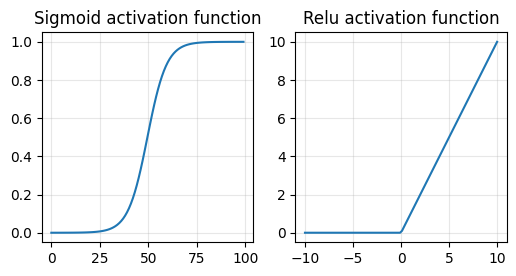

In [2]:
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

def relu(x):
  return np.maximum(0, x)

x = np.linspace(-10, 10, 100)
plt.figure(figsize = (6, 6))

plt.subplot(2, 2, 1)
plt.plot(sigmoid(x))
plt.title("Sigmoid activation function")
plt.grid(alpha = 0.3)

plt.subplot(2, 2, 2)
plt.plot(x, relu(x))
plt.title("Relu activation function")
plt.grid(alpha = 0.3)



In [3]:
np.random.seed(10)
num_samples = 1000
X = np.random.rand(num_samples, 3) * np.array([24, 10, 60])
Y = np.random.rand(num_samples) * 100

In [4]:
pd.DataFrame(X, columns = ["hours_of_sleep", "cup_of_coffee", "travel_time"]).head(5)

,hours_of_sleep,cup_of_coffee,travel_time
0,18.511695,0.207519,38.018894
1,17.971293,4.985070,13.487799
2,4.753509,7.605307,10.146650
3,2.120156,6.853598,57.203601
4,0.094758,5.121923,48.757258


In [5]:
def create_custom_model():
  #input layer
  inputs = keras.Input(shape=(3, ))

  #hidden layer
  x = layers.Dense(2, activation='sigmoid')(inputs)

  #output layer
  outputs = layers.Dense(1, activation='linear')(x)

  model = keras.Model(inputs = inputs, outputs = outputs)
  return model

In [6]:
model = create_custom_model()
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.01),
              loss = 'mean_squared_error')

In [7]:
print(model.summary())

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 3)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 2)              │             8 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11 (44.00 B)

 Trainable params: 11 (44.00 B)

 Non-trainable params: 0 (0.00 B)

None


In [8]:
history = model.fit(X, Y, epochs=150, batch_size=32, validation_split=0.20, verbose=1)

Epoch 1/150
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 3320.8237 - val_loss: 3023.0247
Epoch 2/150
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3294.8127 - val_loss: 2975.1826
Epoch 3/150
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2963.4199 - val_loss: 2928.6404
Epoch 4/150
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3047.3022 - val_loss: 2881.7502
Epoch 5/150
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3185.5872 - val_loss: 2835.6655
Epoch 6/150
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2972.3237 - val_loss: 2791.1045
Epoch 7/150
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2950.1235 - val_loss: 2746.5435
Epoch 8/150
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3040.9966 - val_loss: 2695.9797
Epoch 9/150
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2946.7734 - val_loss: 2553.3955
Epoch 10/150
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2877.1138 - val_loss: 2456.3643
Epoch 11/150
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2545.7520 - val_loss: 2375.0

In [30]:
test_loss = model.evaluate(X, Y, verbose=1)
print(f"Test loss : {test_loss}")

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 851.0795
Test loss : 831.2064819335938


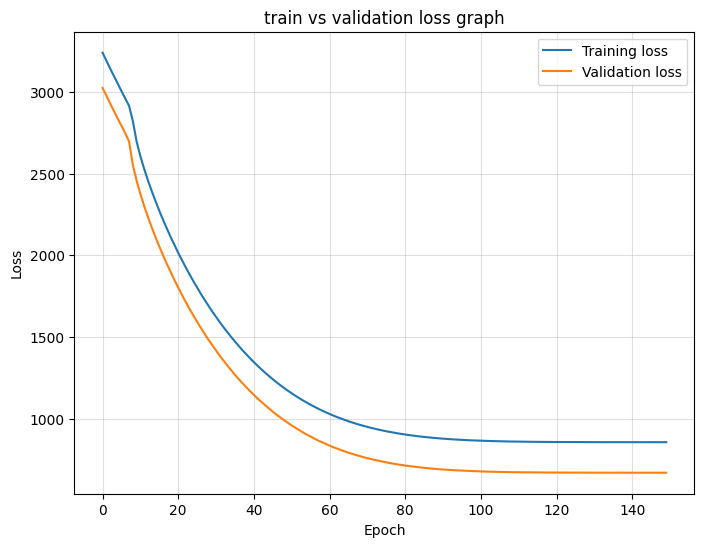

In [9]:
#plot
plt.figure(figsize = (8,6))
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label = 'Validation loss')
plt.title('train vs validation loss graph')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(alpha = 0.4)
plt.legend()

In [10]:
hours_of_sleep = 7
cup_of_coffee = 3
travel_time = 25

sample_data = np.array([[hours_of_sleep, cup_of_coffee, travel_time]])

prediction = model.predict(sample_data)
prediction

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


array([[49.22728]], dtype=float32)